#Разведочный анализ данных удовлетворенности клиентов полётом



Обработка данных и поиск интересных зависимостей.

#Импорт библиотек, константы

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
RANDOM_STATE = 42

In [3]:
DATASET_PATH = "https://raw.githubusercontent.com/evgpat/stepik_from_idea_to_mvp/main/datasets/clients.csv"

## Загрузка и обзор данных

### Загрузка

In [4]:
# загрузка данных
df = pd.read_csv(DATASET_PATH)

### Описание данных

**Целевая переменная**
- `satisfaction`: удовлетворенность клиента полетом, бинарная (*satisfied* или *neutral or dissatisfied*)

**Признаки**
- `Gender` (categorical: _Male_ или _Female_): пол клиента
- `Age` (numeric, int): количество полных лет
- `Customer Type` (categorical: _Loyal Customer_ или _disloyal Customer_): лоялен ли клиент авиакомпании?
- `Type of Travel` (categorical: _Business travel_ или _Personal Travel_): тип поездки
- `Class` (categorical: _Business_ или _Eco_, или _Eco Plus_): класс обслуживания в самолете
- `Flight Distance` (numeric, int): дальность перелета (в милях)
- `Departure Delay in Minutes` (numeric, int): задержка отправления (неотрицательная)
- `Arrival Delay in Minutes` (numeric, int): задержка прибытия (неотрицательная)
- `Inflight wifi service` (categorical, int): оценка клиентом интернета на борту
- `Departure/Arrival time convenient` (categorical, int): оценка клиентом удобство времени прилета и вылета
- `Ease of Online booking` (categorical, int): оценка клиентом удобства онлайн-бронирования
- `Gate location` (categorical, int): оценка клиентом расположения выхода на посадку в аэропорту
- `Food and drink` (categorical, int): оценка клиентом еды и напитков на борту
- `Online boarding` (categorical, int): оценка клиентом выбора места в самолете
- `Seat comfort` (categorical, int): оценка клиентом удобства сиденья
- `Inflight entertainment` (categorical, int): оценка клиентом развлечений на борту
- `On-board service` (categorical, int): оценка клиентом обслуживания на борту
- `Leg room service` (categorical, int): оценка клиентом места в ногах на борту
- `Baggage handling` (categorical, int): оценка клиентом обращения с багажом
- `Checkin service` (categorical, int): оценка клиентом регистрации на рейс
- `Inflight service` (categorical, int): оценка клиентом обслуживания на борту
- `Cleanliness` (categorical, int): оценка клиентом чистоты на борту

## Обзор данных

Посмотрим на *5* случайных объектов из датасета.

In [5]:
df.sample(40)

,id,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Inflight wifi service,...,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction
57868,57869,Male,53.0,Loyal Customer,Business travel,Business,2313.0,0.0,0.0,3.0,...,4.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,satisfied
107832,107833,Female,27.0,Loyal Customer,Personal Travel,Eco,349.0,26.0,16.0,1.0,...,4.0,4.0,4.0,3.0,3.0,5.0,3.0,5.0,4.0,neutral or dissatisfied
90572,90573,Female,39.0,Loyal Customer,Business travel,Eco,545.0,15.0,15.0,1.0,...,1.0,1.0,1.0,2.0,1.0,3.0,4.0,2.0,1.0,neutral or dissatisfied
115086,115087,Female,39.0,Loyal Customer,Business travel,Business,2158.0,0.0,0.0,3.0,...,5.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,3.0,-
121981,121982,Male,46.0,Loyal Customer,Business travel,Business,130.0,0.0,0.0,1.0,...,5.0,5.0,4.0,4.0,4.0,4.0,4.0,4.0,5.0,satisfied
12864,12865,Male,53.0,Loyal Customer,Business travel,Eco Plus,489.0,16.0,6.0,2.0,...,2.0,2.0,2.0,1.0,4.0,3.0,3.0,3.0,2.0,neutral or dissatisfied
119261,119262,Male,40.0,Loyal Customer,Business travel,Business,214.0,0.0,16.0,3.0,...,5.0,5.0,4.0,4.0,4.0,4.0,3.0,4.0,5.0,satisfied
102970,102971,Female,38.0,Loyal Customer,Personal Travel,Business,328.0,0.0,0.0,2.0,...,4.0,4.0,4.0,4.0,2.0,4.0,2.0,4.0,5.0,neutral or dissatisfied
85639,85640,Male,33.0,Loyal Customer,Personal Travel,Eco,259.0,0.0,0.0,2.0,...,0.0,4.0,4.0,2.0,2.0,1.0,1.0,5.0,4.0,neutral or dissatisfied
43176,43177,Male,63.0,Loyal Customer,Business travel,Eco,282.0,0.0,13.0,5.0,...,5.0,5.0,5.0,5.0,2.0,5.0,3.0,2.0,5.0,-


Размеры таблицы .

In [6]:
# ваш код здесь
df.shape

(129880, 24)

## Обработка признаков и однофакторный анализ

На данном этапе:

1) Найдем признаки, у которых есть пропущенные значения и обработаем эти пропущенные значения

2) Переведём категориальные признаки в числовые

In [7]:
df.describe()

,id,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
count,129880.000000,129564.000000,129786.000000,129773.000000,129371.000000,129835.000000,129831.000000,129837.000000,129842.000000,129830.000000,129834.000000,129832.000000,129833.000000,129836.000000,129834.000000,129832.000000,129838.000000,129817.00000,129843.000000
mean,64940.500000,40.113951,1323.385804,15.811301,16.651406,2.732183,3.061857,2.760523,2.981424,3.208349,3.256674,3.445691,3.361395,3.387181,3.356101,3.636107,3.310056,3.64718,3.289865
std,37493.270818,20.365190,4516.191530,93.206139,109.167328,1.359786,1.559323,1.430800,1.312628,1.357649,1.381889,1.349732,1.366866,1.335540,1.361633,1.221818,1.298626,1.21837,1.347625
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,32470.750000,27.000000,414.000000,0.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.00000,2.000000
50%,64940.500000,40.000000,846.000000,0.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.00000,3.000000
75%,97410.250000,51.000000,1744.000000,12.000000,13.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.00000,4.000000
max,129880.000000,621.000000,379620.000000,22227.000000,14006.000000,45.000000,45.000000,45.000000,36.000000,45.000000,40.000000,45.000000,45.000000,45.000000,40.000000,40.000000,45.000000,40.00000,45.000000


In [8]:
df.describe(include = 'object')

,Gender,Customer Type,Type of Travel,Class,satisfaction
count,129549,129803,129779,129764,129880
unique,2,2,2,3,3
top,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
freq,65726,106040,89625,62103,58879


Посмотрим на главный признак satisfaction, он заполнен полностью, но категории 3, а ожидалось две, посмотрим почему

In [9]:
df['satisfaction'].value_counts()

satisfaction
neutral or dissatisfied    58879
satisfied                  45025
-                          25976
Name: count, dtype: int64

Дополнительным значением пропуска заполнено 20% строчек, это довольно много, но от них всё равно придётся избавится, потому что они не оказывают смысловой нагрузки на результат

In [10]:
df = df[df['satisfaction'] != '-']

In [11]:
df['satisfaction'].value_counts()

satisfaction
neutral or dissatisfied    58879
satisfied                  45025
Name: count, dtype: int64

Закодируем значение ответа

In [12]:
df['satisfaction'] = df['satisfaction'].map({'satisfied' : 1, 'neutral or dissatisfied' : 0})

In [13]:
df.sample(5)

,id,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Inflight wifi service,...,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction
7438,7439,Female,19.0,Loyal Customer,Personal Travel,Eco,522.0,37.0,41.0,2.0,...,2.0,4.0,4.0,2.0,2.0,5.0,5.0,5.0,4.0,0
30816,30817,Male,10.0,Loyal Customer,Business travel,Business,3375.0,0.0,0.0,5.0,...,4.0,4.0,4.0,2.0,15.0,4.0,3.0,3.0,4.0,1
10228,10229,Female,61.0,Loyal Customer,Business travel,Business,458.0,0.0,0.0,4.0,...,5.0,5.0,4.0,4.0,4.0,4.0,5.0,4.0,3.0,1
94733,94734,Female,33.0,Loyal Customer,Business travel,Eco,323.0,110.0,112.0,2.0,...,2.0,2.0,2.0,3.0,5.0,4.0,2.0,4.0,2.0,0
44362,44363,Male,38.0,disloyal Customer,Business travel,Eco,196.0,2.0,1.0,2.0,...,1.0,2.0,2.0,3.0,4.0,4.0,2.0,1.0,2.0,0


Кажется для задачи минимизации стоимости билета, признаков слишком много, переведем оставшиеся категориальные признаки строкового типа в числа и посмотрим на корреляцию с целевой переменной

столбец id удалим

In [14]:
df = df.drop(columns=['id'])

### Столбец Gender

In [15]:
df.shape

(103904, 23)

In [16]:
df.describe(include = 'object')

,Gender,Customer Type,Type of Travel,Class
count,103644,103838,103816,103815
unique,2,2,2,3
top,Female,Loyal Customer,Business travel,Business
freq,52590,84873,71596,49615


In [17]:
df['Gender'].value_counts(dropna=False)

Gender
Female    52590
Male      51054
NaN         260
Name: count, dtype: int64

Пустых значений всего 260 удалим их, это меньше 0.2%

In [18]:
df = df.dropna (subset=['Gender'])

In [19]:
df['Gender'].value_counts(dropna=False)

Gender
Female    52590
Male      51054
Name: count, dtype: int64

In [20]:
df['Gender'] = df['Gender'].map({'Male' : 1, 'Female' : 0})

In [21]:
df['Gender'].value_counts(dropna=False)

Gender
0    52590
1    51054
Name: count, dtype: int64

In [22]:
df.shape

(103644, 23)

### Столбец Customer Type

In [23]:
df['Customer Type'].value_counts(dropna=False)

Customer Type
Loyal Customer       84655
disloyal Customer    18923
NaN                     66
Name: count, dtype: int64

Пустых значений очень мало, удалим их

In [24]:
df = df.dropna (subset=['Customer Type'])

In [25]:
df['Customer Type'] = df['Customer Type'].map({'Loyal Customer' : 1, 'disloyal Customer' : 0})

In [26]:
df['Customer Type'].value_counts(dropna=False)

Customer Type
1    84655
0    18923
Name: count, dtype: int64

In [27]:
df.shape

(103578, 23)

### Столбец Type of Travel

In [28]:
df['Type of Travel'].value_counts(dropna=False)

Type of Travel
Business travel    71374
Personal Travel    32116
NaN                   88
Name: count, dtype: int64

По аналогии с предыдущими двумя признаками пустых строчек очень мало, можно удалить их

In [29]:
df = df.dropna (subset=['Type of Travel'])

In [30]:
df['Type of Travel'] = df['Type of Travel'].map({'Business travel' : 1, 'Personal Travel' : 0})

In [31]:
df['Type of Travel'].value_counts(dropna=False)

Type of Travel
1    71374
0    32116
Name: count, dtype: int64

In [32]:
df.shape

(103490, 23)

### Столбец Class

In [33]:
df['Class'].value_counts(dropna=False)

Class
Business    49413
Eco         46531
Eco Plus     7457
NaN            89
Name: count, dtype: int64

Тут тоже значение NaN очень мало, попробуем без этих строчек

In [34]:
df = df.dropna (subset=['Class'])

Закодируем класс при помощи one hot кодирования

In [35]:
df = pd.get_dummies (df, columns=['Class'], drop_first= True ,dtype=float)

In [36]:
df.sample(5)

,Gender,Age,Customer Type,Type of Travel,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction,Class_Eco,Class_Eco Plus
1210,0,35.0,1,0,134.0,0.0,0.0,4.0,0.0,0.0,...,2.0,3.0,2.0,3.0,5.0,5.0,2.0,0,1.0,0.0
87542,0,27.0,0,1,782.0,0.0,0.0,3.0,3.0,3.0,...,5.0,2.0,5.0,4.0,1.0,3.0,5.0,0,1.0,0.0
5363,1,24.0,0,1,785.0,0.0,1.0,0.0,0.0,0.0,...,4.0,3.0,5.0,4.0,3.0,4.0,4.0,1,0.0,0.0
54705,1,59.0,1,1,565.0,1.0,15.0,4.0,1.0,1.0,...,4.0,2.0,4.0,4.0,1.0,3.0,4.0,0,1.0,0.0
122086,1,52.0,1,0,83.0,0.0,0.0,3.0,1.0,3.0,...,4.0,3.0,5.0,3.0,1.0,3.0,4.0,0,1.0,0.0


In [37]:
df.describe()

,Gender,Age,Customer Type,Type of Travel,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction,Class_Eco,Class_Eco Plus
count,103401.000000,103141.000000,103401.000000,103401.000000,103329.000000,103317.000000,102997.000000,103369.000000,103360.000000,103368.000000,...,103360.000000,103369.000000,103365.000000,103369.000000,103367.000000,103352.000000,103370.000000,103401.000000,103401.000000,103401.000000
mean,0.492626,40.053742,0.817342,0.689626,1326.312158,15.811019,16.774683,2.733702,3.065190,2.760825,...,3.361087,3.386441,3.357026,3.635858,3.308358,3.644767,3.289552,0.433487,0.450005,0.072117
std,0.499948,20.333748,0.386388,0.462649,4658.830095,74.031420,109.302611,1.358396,1.554409,1.422609,...,1.360394,1.335088,1.366289,1.227153,1.302204,1.212420,1.344127,0.495559,0.497497,0.258683
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,27.000000,1.000000,0.000000,414.000000,0.000000,0.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,0.000000
50%,0.000000,40.000000,1.000000,1.000000,845.000000,0.000000,0.000000,3.000000,3.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000,0.000000
75%,1.000000,51.000000,1.000000,1.000000,1744.000000,12.000000,13.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,1.000000,1.000000,0.000000
max,1.000000,612.000000,1.000000,1.000000,379620.000000,11011.000000,14006.000000,45.000000,45.000000,45.000000,...,40.000000,45.000000,40.000000,40.000000,45.000000,36.000000,45.000000,1.000000,1.000000,1.000000


Значение пустых ячеек в метриках где клиент ставит оценку заполним медианным значением.

In [38]:
median = df['Inflight wifi service'].median()

df['Inflight wifi service'].fillna(median, inplace=True)

In [39]:
median = df['Departure/Arrival time convenient'].median()

df['Departure/Arrival time convenient'].fillna(median, inplace=True)

In [40]:
median = df['Ease of Online booking'].median()

df['Ease of Online booking'].fillna(median, inplace=True)

In [41]:
median = df['Gate location'].median()

df['Gate location'].fillna(median, inplace=True)

In [42]:
median = df['Food and drink'].median()

df['Food and drink'].fillna(median, inplace=True)

In [43]:
median = df['Online boarding'].median()

df['Online boarding'].fillna(median, inplace=True)

In [44]:
median = df['Seat comfort'].median()

df['Seat comfort'].fillna(median, inplace=True)

In [45]:
median = df['Inflight entertainment'].median()

df['Inflight entertainment'].fillna(median, inplace=True)

In [46]:
median = df['On-board service'].median()

df['On-board service'].fillna(median, inplace=True)

In [47]:
median = df['Leg room service'].median()

df['Leg room service'].fillna(median, inplace=True)

In [48]:
median = df['Baggage handling'].median()

df['Baggage handling'].fillna(median, inplace=True)

In [49]:
median = df['Checkin service'].median()

df['Checkin service'].fillna(median, inplace=True)

In [50]:
median = df['Inflight service'].median()

df['Inflight service'].fillna(median, inplace=True)

In [51]:
median = df['Cleanliness'].median()

df['Cleanliness'].fillna(median, inplace=True)

In [52]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 103401 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103401 non-null  int64  
 1   Age                                103141 non-null  float64
 2   Customer Type                      103401 non-null  int64  
 3   Type of Travel                     103401 non-null  int64  
 4   Flight Distance                    103329 non-null  float64
 5   Departure Delay in Minutes         103317 non-null  float64
 6   Arrival Delay in Minutes           102997 non-null  float64
 7   Inflight wifi service              103401 non-null  float64
 8   Departure/Arrival time convenient  103401 non-null  float64
 9   Ease of Online booking             103401 non-null  float64
 10  Gate location                      103401 non-null  float64
 11  Food and drink                     103401 no

Оставшиеся три числовых признака заполним средним значением, мне не нравится идея их наличия, потому что предполагаемый бизнес-заказчик авиакомпания не может повлиять на эти параметры, а мы решили, что хотим работать с показателями входящими в стоимость билета, но выкинуть их прямо сейчас мы не можем, потому что вполне возможно, что эти признаки сильно связаны с целевой переменной и их остутсвие может сильно повлиять на точность предсказания.

In [53]:
mean = df['Flight Distance'].mean()

df['Flight Distance'].fillna(mean, inplace=True)

In [54]:
mean = df['Departure Delay in Minutes'].mean()

df['Departure Delay in Minutes'].fillna(mean, inplace=True)

In [55]:
mean = df['Arrival Delay in Minutes'].mean()

df['Arrival Delay in Minutes'].fillna(mean, inplace=True)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 103401 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103401 non-null  int64  
 1   Age                                103141 non-null  float64
 2   Customer Type                      103401 non-null  int64  
 3   Type of Travel                     103401 non-null  int64  
 4   Flight Distance                    103401 non-null  float64
 5   Departure Delay in Minutes         103401 non-null  float64
 6   Arrival Delay in Minutes           103401 non-null  float64
 7   Inflight wifi service              103401 non-null  float64
 8   Departure/Arrival time convenient  103401 non-null  float64
 9   Ease of Online booking             103401 non-null  float64
 10  Gate location                      103401 non-null  float64
 11  Food and drink                     103401 no

Мы поработали с пропусками, и закодировали категориальные признаки, теперь поищем некоторые зависимости. Если считать от момента отделение пропущенных значений целевой переменной, что необходимо логически, мы потеряли только 0,4% данных. Думаю, что для нашей задачи это приемлимый результат.

## Исследование признаков

Построим матрицу корреляции столюцов между собой

<Axes: >

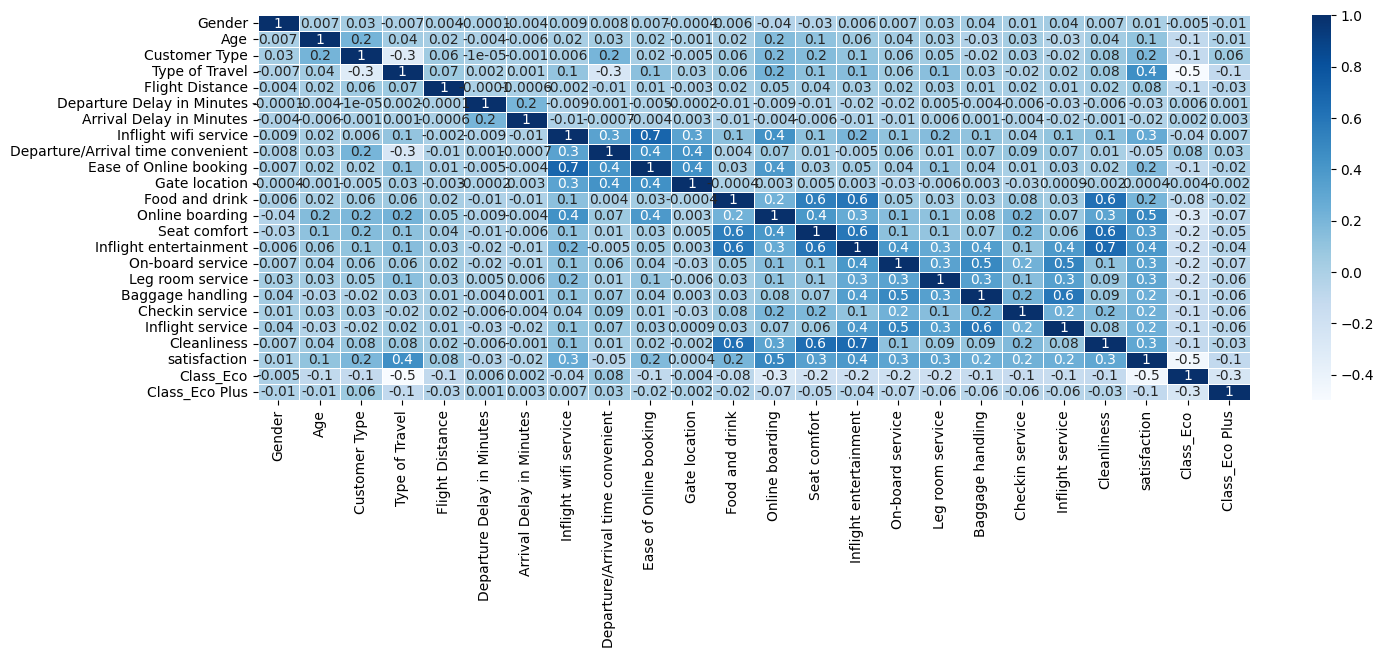

In [57]:
corr = df.corr()
plt.figure(figsize = (16,5))
sns.heatmap(corr, cmap="Blues", annot = True, fmt=".1g", linewidths=.5)

Как и ожидалось, те три числовых признака с которыми были сомнения выше не сильно коррелируют с целевой переменной.

Дополнительно убедимся в этом

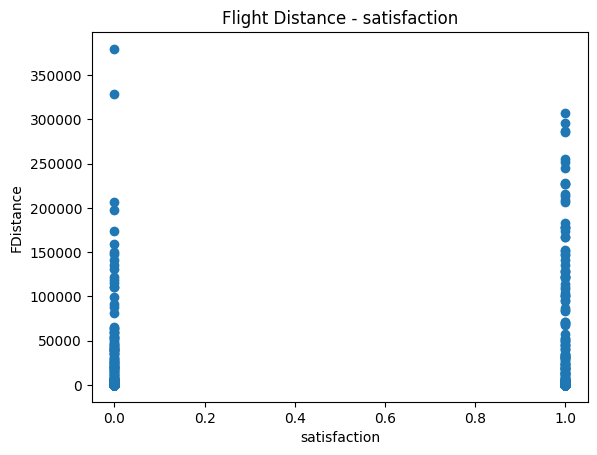

In [58]:
FDistance=df['Flight Distance']
satisfaction=df['satisfaction']
plt.plot(satisfaction, FDistance, 'o')
plt.xlabel('satisfaction')
plt.ylabel('FDistance')
plt.title('Flight Distance - satisfaction');

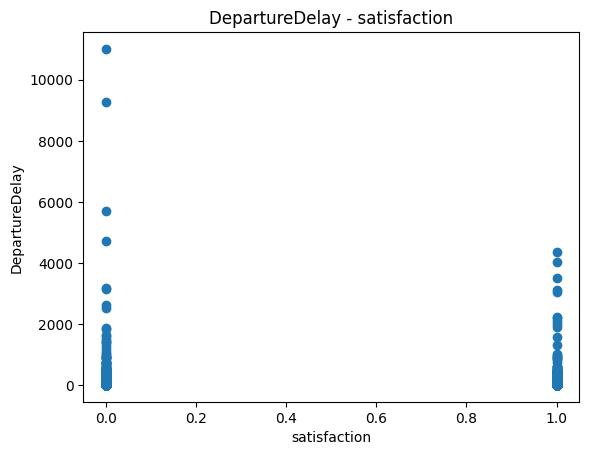

In [59]:
DepartureDelay=df['Departure Delay in Minutes']
satisfaction=df['satisfaction']
plt.plot(satisfaction, DepartureDelay, 'o')

plt.xlabel('satisfaction')
plt.ylabel('DepartureDelay')
plt.title('DepartureDelay - satisfaction');

Можно сделать вывод, что эти параметры влияют только когда сильно отличаются от стандарта или не влияют совсем. Можно с чистой совестью от них избавится.

Уберем ещё значения пола и оценки расположения выхода, исходя из тепловой карты

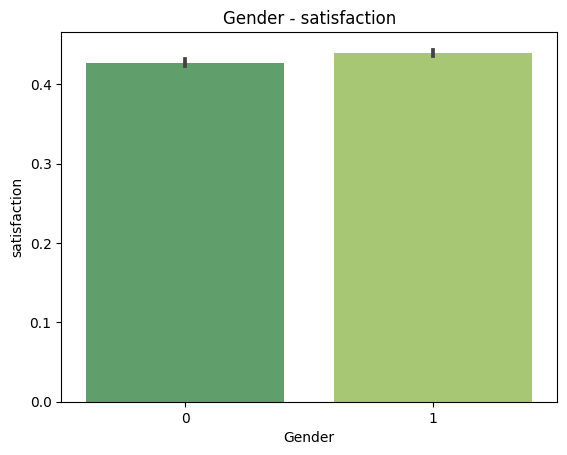

In [60]:
sns.barplot(x='Gender', y='satisfaction', data=df, palette='summer')
plt.title('Gender - satisfaction')
plt.show();

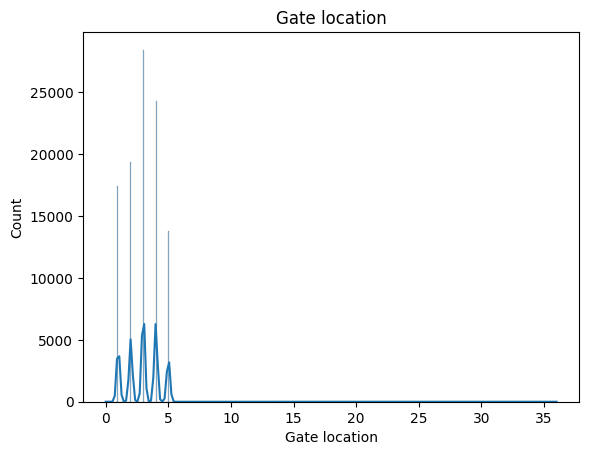

In [61]:
sns.histplot(df['Gate location'], kde=True)
plt.title('Gate location')
plt.show();

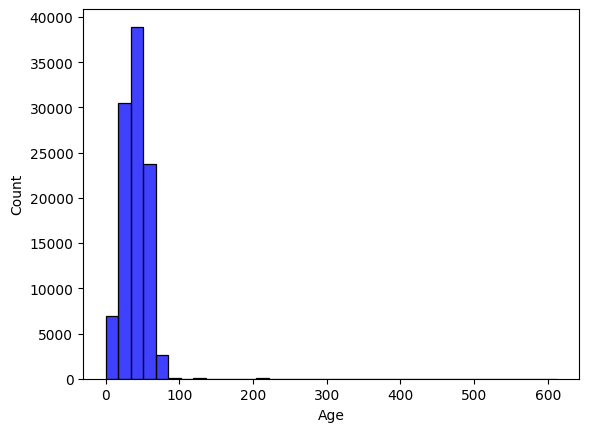

In [62]:
sns.histplot(df['Age'], kde=False, 
             bins=int(180/5), color = 'blue')

plt.show();

В результате вспомогательных построений было найдено много ошибочных данных, попытаемся с этим справится.

In [63]:
df['Age'] = np.where(df['Age'] > 100, 100, df['Age'])

df['Age'].max()

100.0

In [64]:
df['Inflight wifi service'] = np.where(df['Inflight wifi service'] > 5, 5, df['Inflight wifi service'])

df['Inflight wifi service'].max()

5.0

In [65]:
df['Departure/Arrival time convenient'] = np.where(df['Departure/Arrival time convenient'] > 5, 5, df['Departure/Arrival time convenient'])

df['Departure/Arrival time convenient'].max()

5.0

In [66]:
df['Ease of Online booking'] = np.where(df['Ease of Online booking'] > 5, 5, df['Ease of Online booking'])

df['Ease of Online booking'].max()

5.0

In [67]:
df['Gate location'] = np.where(df['Gate location'] > 5, 5, df['Gate location'])

df['Gate location'].max()

5.0

In [68]:
df['Food and drink'] = np.where(df['Food and drink'] > 5, 5, df['Food and drink'])

df['Food and drink'].max()

5.0

In [69]:
df['Online boarding'] = np.where(df['Online boarding'] > 5, 5, df['Online boarding'])

df['Online boarding'].max()

5.0

In [70]:
df['Seat comfort'] = np.where(df['Seat comfort'] > 5, 5, df['Seat comfort'])

df['Seat comfort'].max()

5.0

In [71]:
df['Inflight entertainment'] = np.where(df['Inflight entertainment'] > 5, 5, df['Inflight entertainment'])

df['Inflight entertainment'].max()

5.0

In [72]:
df['On-board service'] = np.where(df['On-board service'] > 5, 5, df['On-board service'])

df['On-board service'].max()

5.0

In [73]:
df['Leg room service'] = np.where(df['Leg room service'] > 5, 5, df['Leg room service'])

df['Leg room service'].max()

5.0

In [74]:
df['Baggage handling'] = np.where(df['Baggage handling'] > 5, 5, df['Baggage handling'])

df['Baggage handling'].max()

5.0

In [75]:
df['Checkin service'] = np.where(df['Checkin service'] > 5, 5, df['Checkin service'])

df['Checkin service'].max()

5.0

In [76]:
df['Inflight service'] = np.where(df['Inflight service'] > 5, 5, df['Inflight service'])

df['Inflight service'].max()

5.0

In [77]:
df['Cleanliness'] = np.where(df['Cleanliness'] > 5, 5, df['Cleanliness'])

df['Cleanliness'].max()

5.0

Посмотрим ничего ли не изменилось в наших графиках

<Axes: >

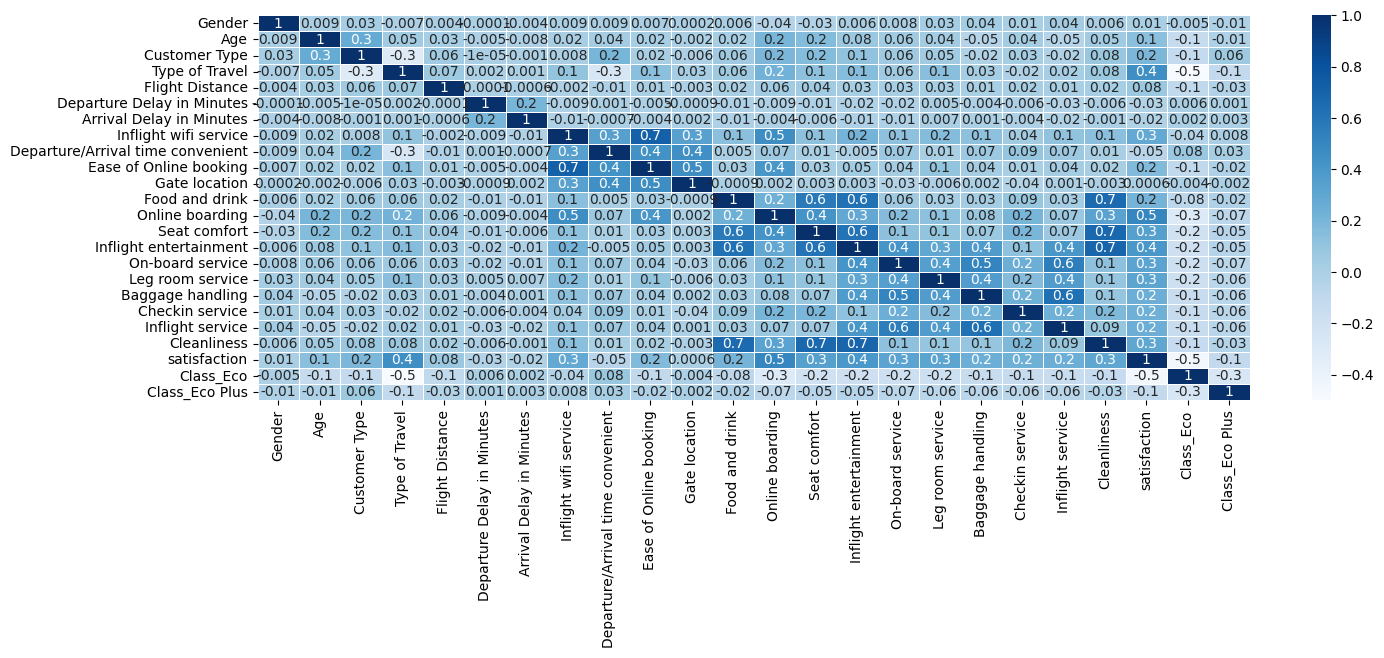

In [78]:
corr = df.corr()
plt.figure(figsize = (16,5))
sns.heatmap(corr, cmap="Blues", annot = True, fmt=".1g", linewidths=.5)

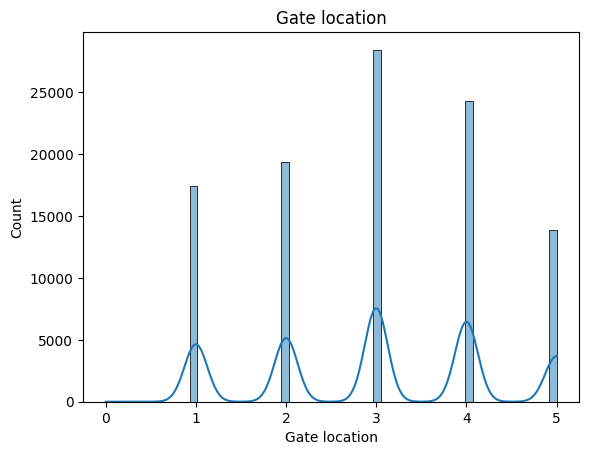

In [79]:
sns.histplot(df['Gate location'], kde=True)
plt.title('Gate location')
plt.show();

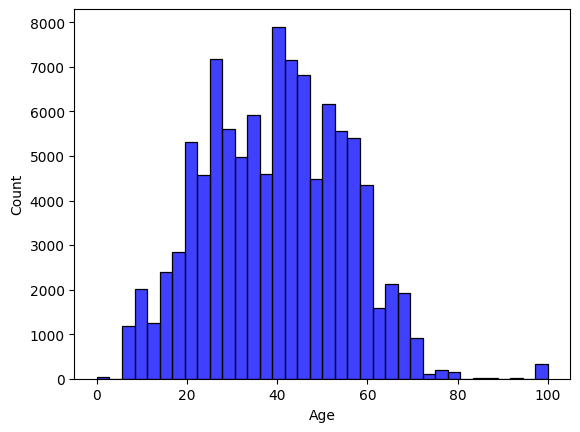

In [80]:
sns.histplot(df['Age'], kde=False, 
             bins=int(180/5), color = 'blue')

plt.show();

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 103401 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103401 non-null  int64  
 1   Age                                103141 non-null  float64
 2   Customer Type                      103401 non-null  int64  
 3   Type of Travel                     103401 non-null  int64  
 4   Flight Distance                    103401 non-null  float64
 5   Departure Delay in Minutes         103401 non-null  float64
 6   Arrival Delay in Minutes           103401 non-null  float64
 7   Inflight wifi service              103401 non-null  float64
 8   Departure/Arrival time convenient  103401 non-null  float64
 9   Ease of Online booking             103401 non-null  float64
 10  Gate location                      103401 non-null  float64
 11  Food and drink                     103401 no

Исключим признаки которые решили

In [82]:
df = df.drop(columns=['Gender','Flight Distance','Departure Delay in Minutes','Arrival Delay in Minutes','Gate location','Departure/Arrival time convenient',])

In [83]:
df.head()

,Age,Customer Type,Type of Travel,Inflight wifi service,Ease of Online booking,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction,Class_Eco,Class_Eco Plus
0,48.0,0,1,3.0,3.0,5.0,3.0,5.0,5.0,3.0,2.0,5.0,4.0,5.0,5.0,0,0.0,0.0
1,35.0,1,1,2.0,2.0,3.0,5.0,4.0,5.0,5.0,5.0,5.0,3.0,5.0,5.0,1,0.0,0.0
2,41.0,1,1,4.0,4.0,5.0,5.0,5.0,3.0,3.0,3.0,3.0,4.0,3.0,5.0,1,0.0,0.0
3,50.0,1,1,2.0,2.0,4.0,4.0,5.0,5.0,5.0,5.0,5.0,3.0,5.0,4.0,1,0.0,0.0
4,49.0,1,1,3.0,3.0,4.0,5.0,4.0,3.0,3.0,4.0,3.0,3.0,3.0,5.0,1,0.0,0.0


In [84]:
df.describe()

,Age,Customer Type,Type of Travel,Inflight wifi service,Ease of Online booking,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction,Class_Eco,Class_Eco Plus
count,103141.000000,103401.000000,103401.000000,103401.000000,103401.000000,103401.000000,103401.000000,103401.000000,103401.000000,103401.000000,103401.000000,103401.000000,103401.000000,103401.000000,103401.000000,103401.000000,103401.000000,103401.000000
mean,39.578160,0.817342,0.689626,2.730805,2.758126,3.202358,3.251013,3.439860,3.358575,3.382559,3.351747,3.631899,3.304697,3.640884,3.286361,0.433487,0.450005,0.072117
std,15.514127,0.386388,0.462649,1.328398,1.399256,1.329300,1.349453,1.319018,1.332883,1.288605,1.315558,1.181250,1.265745,1.175984,1.312022,0.495559,0.497497,0.258683
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,1.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,0.000000
50%,40.000000,1.000000,1.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000,0.000000
75%,51.000000,1.000000,1.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,1.000000,1.000000,0.000000
max,100.000000,1.000000,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.000000,1.000000,1.000000


Посмотрим на попарные зависимости некоторых признаков.

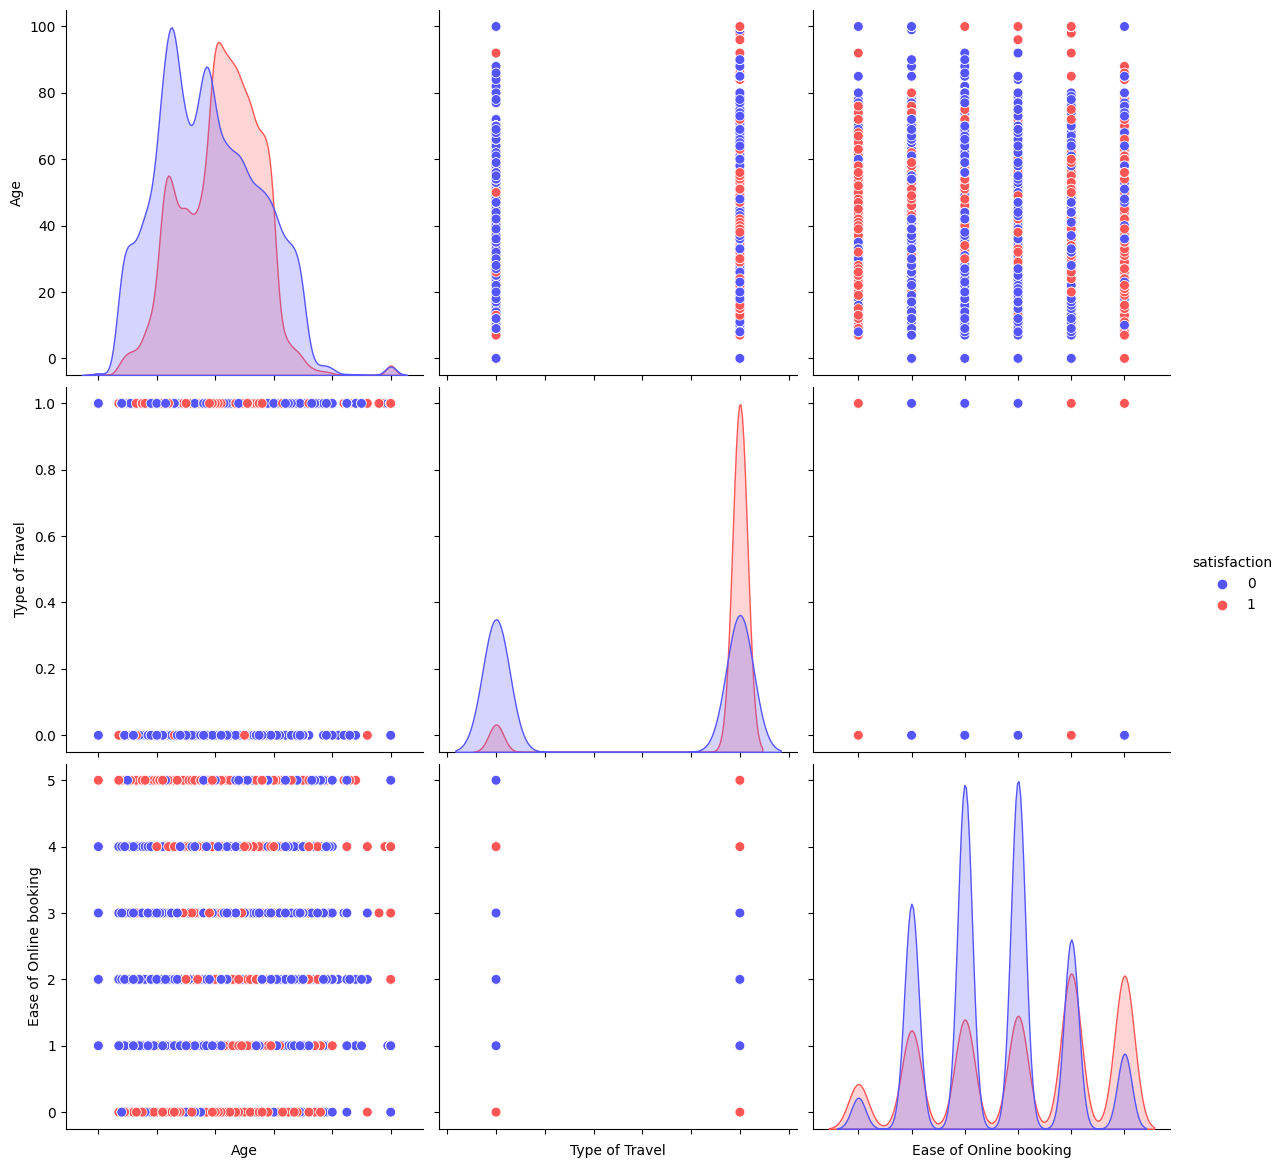

In [85]:
g = sns.pairplot(
    df[['Age', 'Type of Travel','Ease of Online booking','satisfaction']],
    hue='satisfaction',
    palette = 'seismic',
    height=4,
    diag_kind = 'kde',
    diag_kws=dict(fill=True),
    plot_kws=dict(s=50)
    )

g.set(xticklabels=[])

отобранный набор данных будет выглядит вот так

In [86]:
df.head()

,Age,Customer Type,Type of Travel,Inflight wifi service,Ease of Online booking,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction,Class_Eco,Class_Eco Plus
0,48.0,0,1,3.0,3.0,5.0,3.0,5.0,5.0,3.0,2.0,5.0,4.0,5.0,5.0,0,0.0,0.0
1,35.0,1,1,2.0,2.0,3.0,5.0,4.0,5.0,5.0,5.0,5.0,3.0,5.0,5.0,1,0.0,0.0
2,41.0,1,1,4.0,4.0,5.0,5.0,5.0,3.0,3.0,3.0,3.0,4.0,3.0,5.0,1,0.0,0.0
3,50.0,1,1,2.0,2.0,4.0,4.0,5.0,5.0,5.0,5.0,5.0,3.0,5.0,4.0,1,0.0,0.0
4,49.0,1,1,3.0,3.0,4.0,5.0,4.0,3.0,3.0,4.0,3.0,3.0,3.0,5.0,1,0.0,0.0


Сохраним его в файл

In [87]:
df.to_csv (r'C:\work\bootcamp_ml\ml_airbootcamp\new_data.csv', index= False )

Попробуем с pickle

In [88]:
df.to_pickle ("new_data.pkl ")